In [ ]:
#%pip install matplotlib
#%pip install pandas

Total Consumption (kWh):2242.0


Text(0.5, 1.0, 'Total Consumption (kWh, 2021-2023)')

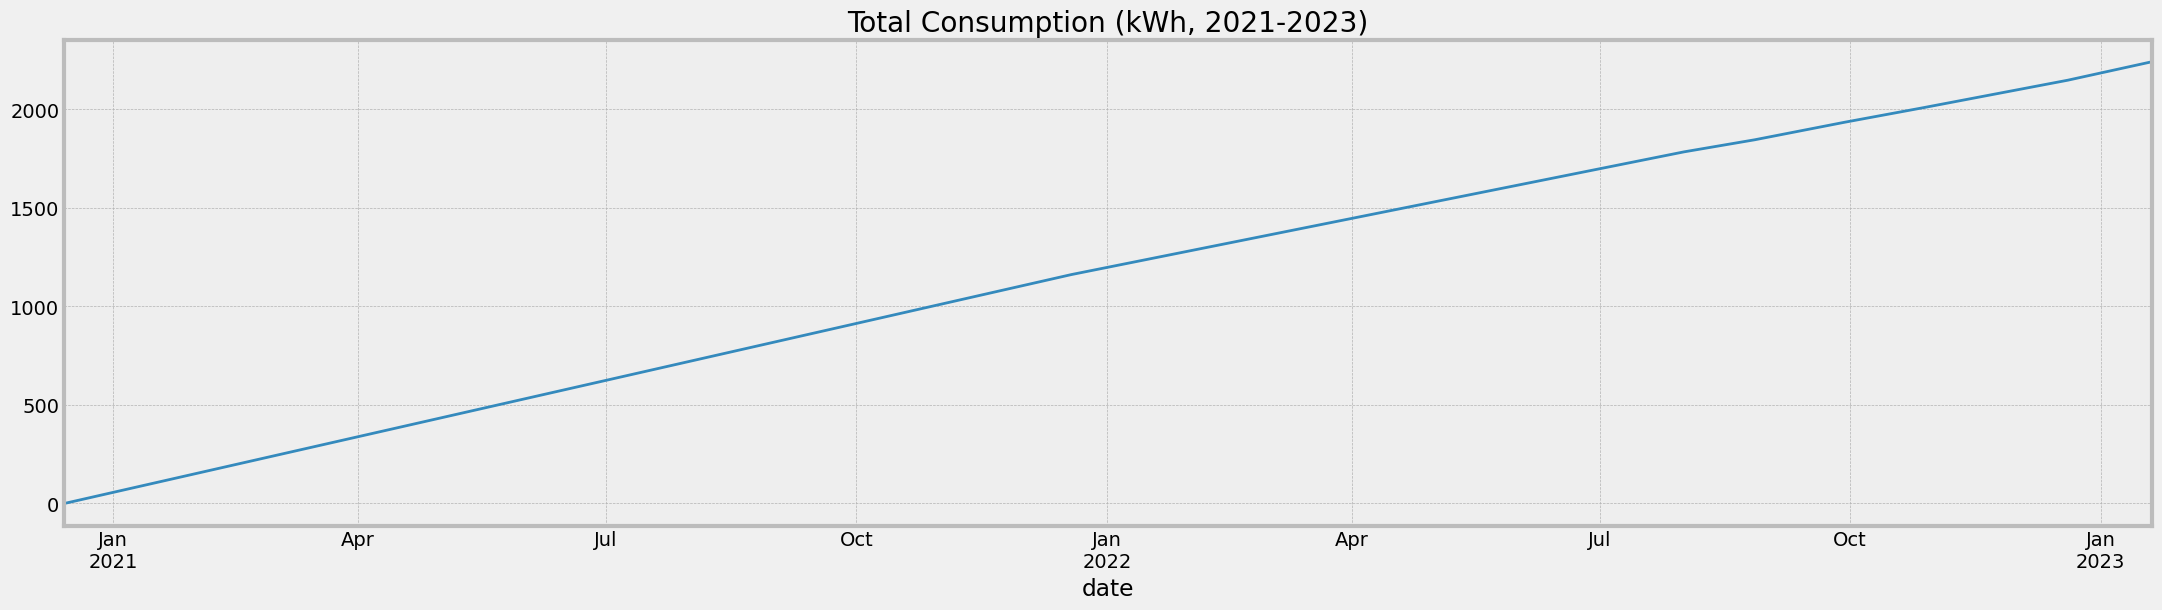

In [28]:
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
import numpy as np

df = pd.DataFrame({'day': ['2020-12-14', '2021-12-18','2022-07-31', '2022-08-26', '2022-09-26','2022-10-22','2022-12-19','2023-01-20'], 
                   'measurements': [25005, 26164, 26787, 26848, 26932,26998,27150,27247]})


df['date'] = pd.to_datetime(df['day'], infer_datetime_format=True)
df = df.drop(['day'], axis=1)
df.set_index("date", inplace=True)

#df = df.resample('D').fillna(method='backfill')
df = df.resample('D').interpolate(method='linear')
df.min()
df -= df.min()
print(f"Total Consumption (kWh):{df['measurements'].max()}")
plt.style.use('bmh')
plt.figure(figsize=[24,6])
df['measurements'].plot()
plt.title('Total Consumption (kWh, 2021-2023)', loc='center')


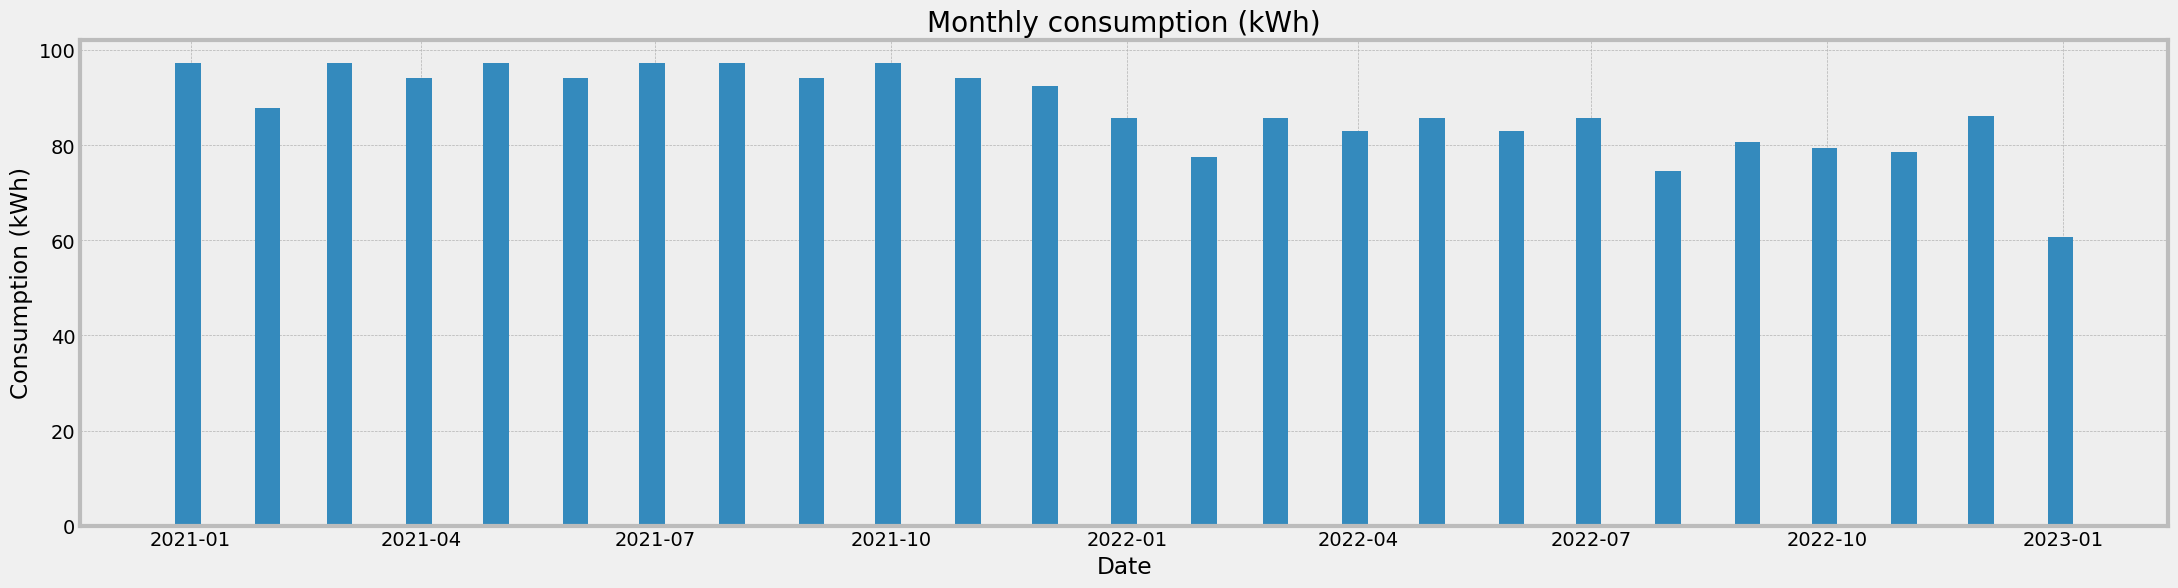

In [29]:

#df
df_monthly = df.resample(rule='M')['measurements'].max().diff().shift(-1)
#print(df_monthly.head())
plt.style.use('bmh')
plt.figure(figsize=[24,6])
plt.xlabel("Date")
plt.ylabel("Consumption (kWh)")
plt.title("Monthly consumption (kWh)")
plt.bar(df_monthly.index, df_monthly.values, width=10)
plt.show()

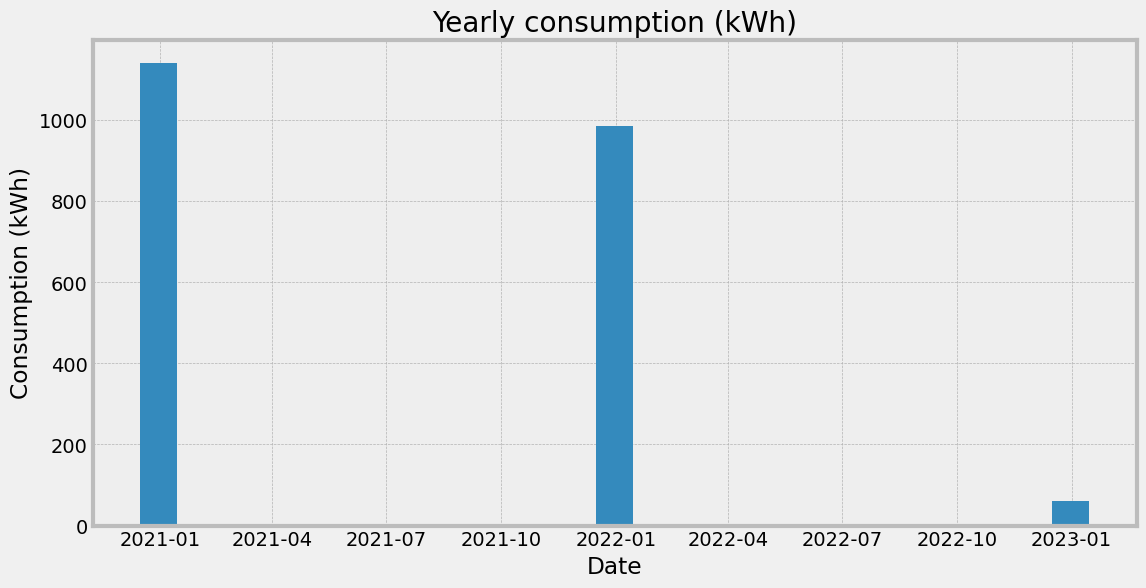

In [33]:
df_yearly = df.resample(rule='Y')['measurements'].max().diff().shift(-1)
plt.style.use('bmh')
plt.figure(figsize=[12,6])
plt.xlabel("Date")
plt.ylabel("Consumption (kWh)")
plt.title("Yearly consumption (kWh)")
plt.bar(df_yearly.index, df_yearly.values, width=30)
plt.show()